# 08-deep-learning

https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/08-deep-learning/homework.md

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [3]:
# The dataset contains around 1900 images of dinos and around 1900 images of dragons.
# !wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
# !unzip dino-dragon.zip

For this homework we will use Convolutional Neural Network (CNN).

You need to develop the model with following structure:

* The shape for input should be (150, 150, 3)
* Next, create a convolutional layer (Conv2D):
** Use 32 filters
** Kernel size should be (3, 3) (that's the size of the filter)
** Use 'relu' as activation
* Reduce the size of the feature map with max pooling (MaxPooling2D)
** Set the pooling size to (2, 2)
* Turn the multi-dimensional result into vectors using a Flatten layer
* Next, add a Dense layer with 64 neurons and 'relu' activation
* Finally, create the Dense layer with 1 neuron - this will be the output
** The output layer should have an activation - use the appropriate activation for the binary classification case
* As optimizer use SGD with the following parameters:
** SGD(lr=0.002, momentum=0.8)

In [4]:
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')    
])

optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

2022-11-20 23:25:49.007976: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-20 23:25:49.013061: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Question 1

Since we have a binary classification problem, what is the best loss function for us?

Answer: __binary crossentropy__

# Question 2

What's the total number of parameters of the model? You can use the summary method for that.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

Answer: __11215873__

# Generators and Training

For the next two questions, use the following data generator for both train and validation:

In [6]:
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the class_mode parameter. Which value should it be for a binary classification problem?
* Use batch_size=20
* Use shuffle=True for both training and validation

In [7]:
train_ds = train_gen.flow_from_directory('train', 
                                         batch_size=20, 
                                         class_mode='binary', 
                                         shuffle=True, 
                                         target_size=(150,150))
val_ds = val_gen.flow_from_directory('test', 
                                     batch_size=20, 
                                     class_mode='binary', 
                                     shuffle=True, 
                                     target_size=(150,150))

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [8]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 40s 486ms/step - loss: 0.6961 - accuracy: 0.5270 - val_loss: 0.6854 - val_accuracy: 0.6548
Epoch 2/10
80/80 [==============================] - 31s 393ms/step - loss: 0.6523 - accuracy: 0.6593 - val_loss: 0.6184 - val_accuracy: 0.7360
Epoch 3/10
80/80 [==============================] - 37s 459ms/step - loss: 0.5747 - accuracy: 0.7246 - val_loss: 0.5415 - val_accuracy: 0.7310
Epoch 4/10
80/80 [==============================] - 35s 438ms/step - loss: 0.4980 - accuracy: 0.7742 - val_loss: 0.5275 - val_accuracy: 0.7132
Epoch 5/10
80/80 [==============================] - 32s 407ms/step - loss: 0.4132 - accuracy: 0.8300 - val_loss: 0.3917 - val_accuracy: 0.8401
Epoch 6/10
80/80 [==============================] - 34s 420ms/step - loss: 0.4056 - accuracy: 0.8187 - val_loss: 0.4389 - val_accuracy: 0.8046
Epoch 7/10
80/80 [==============================] - 32s 399ms/step - loss: 0.3335 - accuracy: 0.8739 - val_loss: 0.3414 - val_accuracy: 0.8452

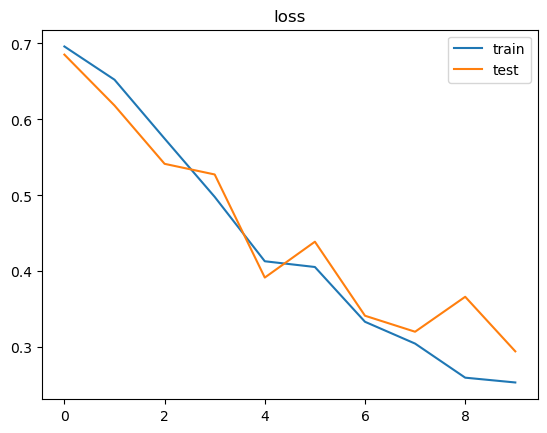

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('loss')
plt.legend();

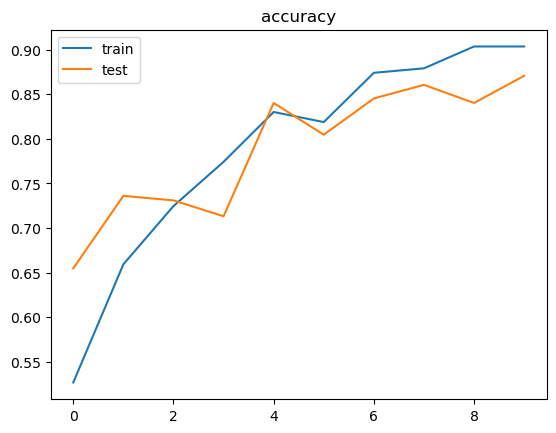

In [10]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('accuracy')
plt.legend();

# Question 3

What is the median of training accuracy for all the epochs for this model?

In [11]:
np.median(history.history['accuracy'])

0.8243412971496582

Answer: __0.9__

# Question 4

What is the standard deviation of training loss for all the epochs for this model?

In [12]:
np.std(history.history['loss'])

0.15195926073639923

Answer: __0.11__

# Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

* rotation_range=40,
* width_shift_range=0.2,
* height_shift_range=0.2,
* shear_range=0.2,
* zoom_range=0.2,
* horizontal_flip=True,
* fill_mode='nearest'

In [13]:
train_gen = ImageDataGenerator(rescale=1./255, 
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

In [14]:
train_ds = train_gen.flow_from_directory('train', 
                                         batch_size=20, 
                                         class_mode='binary', 
                                         shuffle=True, 
                                         target_size=(150,150))

Found 1594 images belonging to 2 classes.


In [15]:
history_aug = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 46s 571ms/step - loss: 0.4838 - accuracy: 0.7591 - val_loss: 0.4588 - val_accuracy: 0.7690
Epoch 2/10
80/80 [==============================] - 43s 538ms/step - loss: 0.4321 - accuracy: 0.8036 - val_loss: 0.3811 - val_accuracy: 0.8274
Epoch 3/10
80/80 [==============================] - 44s 547ms/step - loss: 0.4267 - accuracy: 0.8093 - val_loss: 0.4228 - val_accuracy: 0.8020
Epoch 4/10
80/80 [==============================] - 45s 561ms/step - loss: 0.4253 - accuracy: 0.8087 - val_loss: 0.4790 - val_accuracy: 0.7741
Epoch 5/10
80/80 [==============================] - 41s 515ms/step - loss: 0.3764 - accuracy: 0.8300 - val_loss: 0.6975 - val_accuracy: 0.7107
Epoch 6/10
80/80 [==============================] - 46s 572ms/step - loss: 0.3978 - accuracy: 0.8143 - val_loss: 0.4138 - val_accuracy: 0.8122
Epoch 7/10
80/80 [==============================] - 41s 514ms/step - loss: 0.3738 - accuracy: 0.8319 - val_loss: 0.3298 - val_accuracy: 0.8553

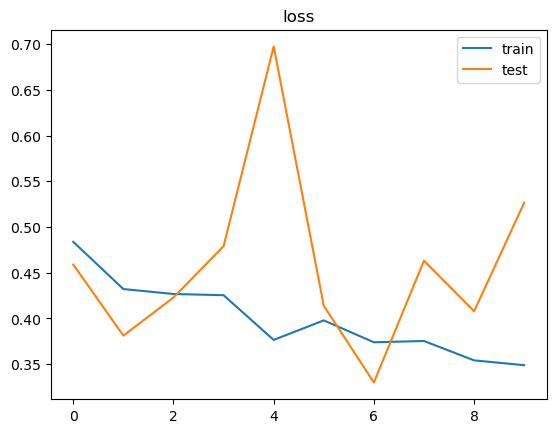

In [16]:
plt.plot(history_aug.history['loss'], label='train')
plt.plot(history_aug.history['val_loss'], label='test')
plt.title('loss')
plt.legend();

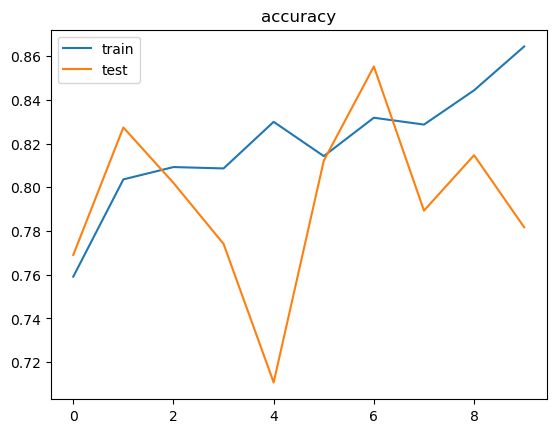

In [17]:
plt.plot(history_aug.history['accuracy'], label='train')
plt.plot(history_aug.history['val_accuracy'], label='test')
plt.title('accuracy')
plt.legend();

# Question 5

What is the mean of validation loss for all the epochs for the model trained with augmentations?

In [18]:
np.mean(history_aug.history['val_loss'])

0.4580240845680237

Answer: __0.37__

# Question 6

What's the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [19]:
np.mean(history_aug.history['val_accuracy'][-5:])

0.8106598854064941

Answer: __0.84__